# Use Case
#### Use Case Summary
#### Objective Statement:
- Determine the churn rate of the customer base.
- Identify factors that are associated with churn, such as gender, senior citizen status, partner status, dependents, number of services booked, paperless billing, payment method, contract type, monthly charges, total charges, and tenure.
- Develop a machine learning model to predict customer churn.

#### Challenges:
- The dataset is large and contains missing values and different data types.
- It is not possible to maintain the dataset in Excel or a spreadsheet.

#### Methodology / Analytic Technique:
- Exploratory analysis (graph analysis) will be used to identify patterns and trends in the data.
- Descriptive statistics will be used to summarize the data and identify key metrics.
- Classification models will be used to identify factors that are associated with churn.
- Statistical analysis will be used to test the significance of the findings.

#### Business Benefit:
- Increased understanding of customer churn drivers
- Improved ability to predict customer churn
- Development of targeted interventions to reduce churn
- Increased customer retention and revenue

#### Expected Outcome:
- A comprehensive understanding of customer churn drivers
- A machine learning model that can accurately predict customer churn
- Recommendations for targeted interventions to reduce churn
- Increased customer retention and revenue



# Business Understanding
* A telephone company, also known as a telco, telephone service provider, or telecommunications operator, is a kind of communications service provider, more precisely a telecommunications service provider, that provides telecommunications services such as telephony and data communications access.
* Churn rate is the rate at which customers stop doing business with a company over a given period of time.

This case requires data-driven answers to the following questions:
* How many customers are churning?
* What's the insight on churn and non-churn customers based on customers demographic info such as gender, senior citizen, partner, and dependents?
* What's the insight on churn and non-churn customers based on customer services booked  such as phone service multiple lines, internet service, online security, online backup, device protection, tech support, streaming TV and streaming movies?
* What's the insight on churn and non-churn customers based on customer account information such as paperless billing, payment method, and contract?
* Is there a relationship between monthly charges, total charges, and tenure on churn rate?



# Data Understanding
#### Data Source
* The data set is a collection of customer retention programs.
* The data set has 7043 rows and 21 columns.
* Source Data: Telco Customer Churn by International Business Machines Corporations (IBM) Sample Data Set.
    https://www.kaggle.com/datasets/blastchar/telco-customer-churn

#### Data Dictionary
Classification labels
* Churn — Whether the customer churned or not (Yes or No)

Customer services booked
* PhoneService — Whether the customer has a phone service (Yes, No)
* MultipleLines — Whether the customer has multiple lines (Yes, No, No phone service)
* InternetService — Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity — Whether the customer has online security (Yes, No, No internet service)
* OnlineBackup — Whether the customer has online backup (Yes, No, No internet service)
* DeviceProtection — Whether the customer has device protection (Yes, No, No internet service)
* TechSupport — Whether the customer has tech support (Yes, No, No internet service)
* StreamingTV — Whether the customer has streaming TV (Yes, No, No internet service)
* StreamingMovies — Whether the customer has streaming movies (Yes, No, No internet service)

Customer account information
* Tenure — Number of months the customer has stayed with the company
* Contract — The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling — Whether the customer has paperless billing (Yes, No)
* PaymentMethod — The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges — The amount charged to the customer monthly
* TotalCharges — The total amount charged to the customer

Customers demographic info
* customerID — Customer ID
* Gender — Whether the customer is a male or a female
* SeniorCitizen — Whether the customer is a senior citizen or not (1, 0)
* Partner — Whether the customer has a partner or not (Yes, No)
* Dependents — Whether the customer has dependents or not (Yes, No)

# Data Preparation
Code Used :
* Python Version : !python -V (Python 3.8.8)
* Packages : Pandas, Numpy, Matplotlib, Seaborn, SKlearn, Warnings

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, log_loss

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
#from imblearn.over_sampling import SMOTE

import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

# Data Profiling

In [81]:
df = pd.read_csv('data_telco.csv')

In [82]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,NaN,NaN,NaN,1,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,NaN,NaN,NaN,NaN,34,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,NaN,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,NaN,NaN,NaN,NaN,45,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,NaN,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [83]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0.0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            6034 non-null   object 
 2   SeniorCitizen     6034 non-null   float64
 3   Partner           6034 non-null   object 
 4   Dependents        6034 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     6034 non-null   object 
 8   InternetService   6034 non-null   object 
 9   OnlineSecurity    6034 non-null   object 
 10  OnlineBackup      6034 non-null   object 
 11  DeviceProtection  6034 non-null   object 
 12  TechSupport       6034 non-null   object 
 13  StreamingTV       6034 non-null   object 
 14  StreamingMovies   6034 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [85]:
df.isna().sum()

customerID             0
gender              1009
SeniorCitizen       1009
Partner             1009
Dependents          1009
tenure                 0
PhoneService           0
MultipleLines       1009
InternetService     1009
OnlineSecurity      1009
OnlineBackup        1009
DeviceProtection    1009
TechSupport         1009
StreamingTV         1009
StreamingMovies     1009
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

In [86]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

customerID           0.000000
gender              14.326281
SeniorCitizen       14.326281
Partner             14.326281
Dependents          14.326281
tenure               0.000000
PhoneService         0.000000
MultipleLines       14.326281
InternetService     14.326281
OnlineSecurity      14.326281
OnlineBackup        14.326281
DeviceProtection    14.326281
TechSupport         14.326281
StreamingTV         14.326281
StreamingMovies     14.326281
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.000000
Churn                0.000000
dtype: float64

# Data Cleansing

* ### Change Data Value

The code below is written to convert the SeniorCitizen column from numeric to categorical data. The SeniorCitizen column originally contains numeric values of 0 and 1, where 0 indicates "No" and 1 indicates "Yes". The code above uses the map() function to map these numeric values to their corresponding string values. This makes the data easier to interpret and analyze.

In [7]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0.0:'No', 1.0:'Yes'})

In [8]:
df['SeniorCitizen'].value_counts()

No     5057
Yes     977
Name: SeniorCitizen, dtype: int64

The "No" column has 5057 customers, which is more than the "Yes" column with 977 customers. This means that there are more customers who are not senior citizens than there are senior citizens.

In [9]:
df.columns[df.isnull().any()]

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

* ### Fill the missing value

The code below is used to fill in missing values in the df DataFrame. The code first creates a list of columns that contain missing values. Then, for each column in the list, the code fills in the missing values with the string "Unknown".

In [10]:
data = df.columns[df.isnull().any()]
for i in data:
    df[i]=df[i].fillna('Unknown')

In [11]:
df['SeniorCitizen'].value_counts()

No         5057
Unknown    1009
Yes         977
Name: SeniorCitizen, dtype: int64

The output shows the number of customers who are "No", "Unknown", and "Yes" to the Churn column. The "No" column has 5057 customers, which is more than the "Unknown" column with 1009 customers and the "Yes" column with 977 customers. This means that there are more customers who do not churn than there are customers who churn or who the churn status is unknown.

* ### Change Data Types
The code below is used to convert the TotalCharges column in the df DataFrame to numeric data type. If the conversion is not possible, the code uses the errors='coerce' argument to coerce the non-numeric values to NaN.

In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [14]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

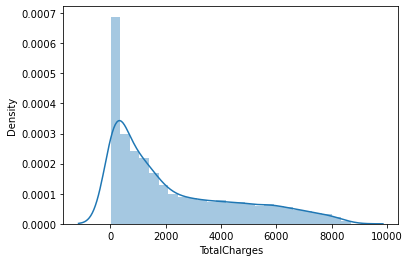

In [15]:
sns.distplot(df['TotalCharges']) 

In [16]:
val = df['TotalCharges'].median()
df['TotalCharges'] = df['TotalCharges'].fillna(val)

# Exploratory Data Analysis

### Churn Data Distribution Analysis

- How many customers are churning?

     Churn  Churn %
No    5174    73.46
Yes   1869    26.54


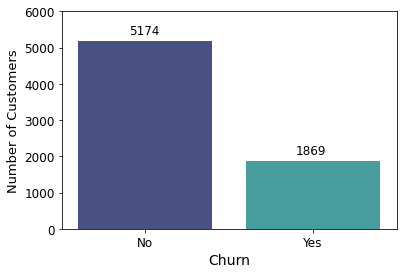

In [17]:
df_churn = pd.DataFrame(df["Churn"].value_counts())
df_churn['Churn %'] = [round(i*100/sum(df_churn.Churn),2) for i in df_churn.Churn]
print(df_churn)

ax = sns.countplot(data = df, palette = 'mako', x="Churn")

plt.xlabel("Churn", fontsize= 14)
plt.ylabel("Number of Customers", fontsize= 13)
plt.ylim(0,6000)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+200), fontsize= 12)

The majority of customers are still using the service (73.46%), while a minority of customers have stopped using the service (26.54%).

### Customers Demographic Info Analysis

#### What's the insight on churn and non-churn customers based on customers demographic info such as gender, senior citizen, partner, and dependents?


* #### Gender

         gender  Percent  Churn  Churn %  Non-Churn  Non-Churn %
Male       3041    43.18    802    43.12       2239        43.27
Female     2993    42.50    806    42.91       2187        42.27
Unknown    1009    14.33    261    13.96        748        14.46


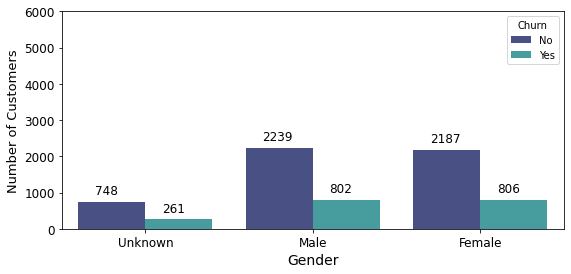

In [18]:
# Description Percent
df_gender = pd.DataFrame(df["gender"].value_counts())
df_gender['Percent'] = [round(i*100/sum(df_gender.gender),2) for i in df_gender.gender]

y = (df["Churn"] == 'Yes')
n = (df["Churn"] == 'No')

df_gender_churn = pd.DataFrame(df.gender[y].value_counts())
df_gender['Churn'] = df_gender_churn.gender
df_gender['Churn %'] = [round(i*100/sum(df_gender_churn.gender),2) for i in df_gender_churn.gender]

df_gender_nonchurn = pd.DataFrame(df.gender[n].value_counts())
df_gender['Non-Churn'] = df_gender_nonchurn.gender
df_gender['Non-Churn %'] = [round(i*100/sum(df_gender_nonchurn.gender),2) for i in df_gender_nonchurn.gender]
print(df_gender)

# Chart
plt.figure(figsize=(9,4))

ax = sns.countplot(data = df, palette = 'mako', x="gender", hue = "Churn")

plt.xlabel("Gender", fontsize= 14)
plt.ylabel("Number of Customers", fontsize= 13)
plt.ylim(0,6000)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+200), fontsize= 12)

- **Female churn customers are almost as likely as male churn customers to stop using the service**.

- About 43% of male customers and 42% of female customers have stopped using the service.

- About 43% of male customers and 43% of female customers are still subscribed to the service.

* #### SeniorCitizen

         SeniorCitizen  Percent  Churn  Churn %  Non-Churn  Non-Churn %
No                5057     71.8   1197     64.0       3860         74.6
Unknown           1009     14.3    261     22.0        748         14.5
Yes                977     13.9    411     14.0        566         10.9


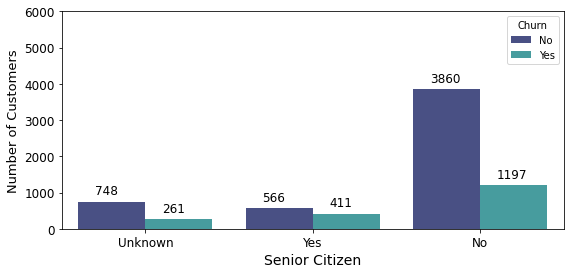

In [19]:
# Description Percent
df_SeniorCitizen = pd.DataFrame(df["SeniorCitizen"].value_counts())
df_SeniorCitizen['Percent'] = [round(i*100/sum(df_SeniorCitizen.SeniorCitizen),1) for i in df_SeniorCitizen.SeniorCitizen]

df_SeniorCitizen_churn = pd.DataFrame(df.SeniorCitizen[(df["Churn"] == 'Yes')].value_counts())
df_SeniorCitizen['Churn'] = df_SeniorCitizen_churn.SeniorCitizen
df_SeniorCitizen['Churn %'] = [round(i*100/sum(df_SeniorCitizen_churn.SeniorCitizen),1) for i in df_SeniorCitizen_churn.SeniorCitizen]

df_SeniorCitizen_nonchurn = pd.DataFrame(df.SeniorCitizen[(df["Churn"] == 'No')].value_counts())
df_SeniorCitizen['Non-Churn'] = df_SeniorCitizen_nonchurn.SeniorCitizen
df_SeniorCitizen['Non-Churn %'] = [round(i*100/sum(df_SeniorCitizen_nonchurn.SeniorCitizen),1) for i in df_SeniorCitizen_nonchurn.SeniorCitizen]
print(df_SeniorCitizen)


# Chart
plt.figure(figsize=(9,4))

ax = sns.countplot(data = df, palette = 'mako', x="SeniorCitizen", hue = "Churn")

plt.xlabel("Senior Citizen", fontsize= 14)
plt.ylabel("Number of Customers", fontsize= 13)
plt.ylim(0,6000)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+200), fontsize= 12)

- **Young customers are the biggest users of the service, but they are also the most likely to stop using it**.

- About 64% of young customers are still subscribed to the service, while about 74.6% of young customers have stopped using the service.

- About 14% of senior customers are still subscribed to the service, while about 10.9% of senior customers have stopped using the service.

- About 22% of customers have an unknown age category.

* #### Partner

         Partner  Percent  Churn  Churn %  Non-Churn  Non-Churn %
No          3111     44.2   1032     55.2       2079         45.4
Yes         2923     41.5    576     30.8       2347         40.2
Unknown     1009     14.3    261     14.0        748         14.5


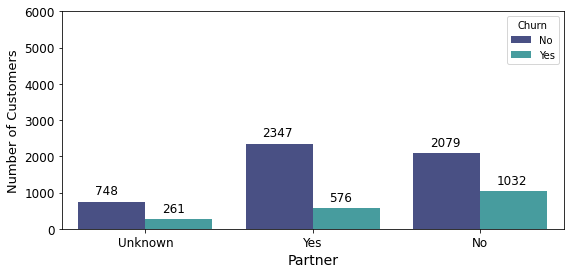

In [20]:
# Description Percent
df_Partner = pd.DataFrame(df["Partner"].value_counts())
df_Partner['Percent'] = [round(i*100/sum(df_Partner.Partner),1) for i in df_Partner.Partner]

df_Partner_churn = pd.DataFrame(df.Partner[(df["Churn"] == 'Yes')].value_counts())
df_Partner['Churn'] = df_Partner_churn.Partner
df_Partner['Churn %'] = [round(i*100/sum(df_Partner_churn.Partner),1) for i in df_Partner_churn.Partner]

df_Partner_nonchurn = pd.DataFrame(df.Partner[(df["Churn"] == 'No')].value_counts())
df_Partner['Non-Churn'] = df_Partner_nonchurn.Partner
df_Partner['Non-Churn %'] = [round(i*100/sum(df_Partner_nonchurn.Partner),1) for i in df_Partner_nonchurn.Partner]

print(df_Partner)

# Chart
plt.figure(figsize=(9,4))

ax = sns.countplot(data = df, palette = 'mako', x="Partner", hue = "Churn")

plt.xlabel("Partner", fontsize= 14)
plt.ylabel("Number of Customers", fontsize= 13)
plt.ylim(0,6000)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+200), fontsize= 12)

- **Customers without a partner are more likely to stop using the service than customers with a partner**.

- About 55% of customers without a partner have stopped using the service, while only 31% of customers with a partner have stopped using the service.

- About 45% of customers with a partner are still using the service, while only 40% of customers without a partner are still using the service.

- About 14% of customers have an unknown partner status.

* #### Dependents

         Dependents  Percent  Churn  Churn %  Non-Churn  Non-Churn %
No             4238     60.2   1326     70.9       2912         56.3
Yes            1796     25.5    282     15.1       1514         29.3
Unknown        1009     14.3    261     14.0        748         14.5


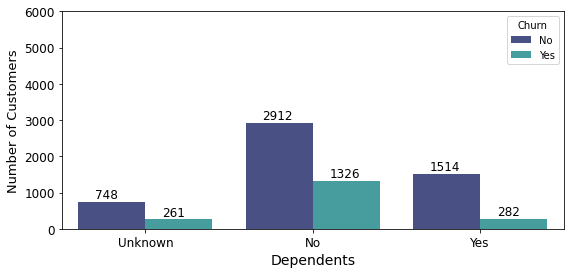

In [21]:
# Description Percent
df_Dependents = pd.DataFrame(df["Dependents"].value_counts())
df_Dependents['Percent'] = [round(i*100/sum(df_Dependents.Dependents),1) for i in df_Dependents.Dependents]

df_Dependents_churn = pd.DataFrame(df.Dependents[(df["Churn"] == 'Yes')].value_counts())
df_Dependents['Churn'] = df_Dependents_churn.Dependents
df_Dependents['Churn %'] = [round(i*100/sum(df_Dependents_churn.Dependents),1) for i in df_Dependents_churn.Dependents]

df_Dependents_nonchurn = pd.DataFrame(df.Dependents[(df["Churn"] == 'No')].value_counts())
df_Dependents['Non-Churn'] = df_Dependents_nonchurn.Dependents
df_Dependents['Non-Churn %'] = [round(i*100/sum(df_Dependents_nonchurn.Dependents),1) for i in df_Dependents_nonchurn.Dependents]

print(df_Dependents)

# Chart

plt.figure(figsize=(9,4))

ax = sns.countplot(data = df, palette = 'mako', x="Dependents", hue = "Churn")

plt.xlabel("Dependents", fontsize= 14)
plt.ylabel("Number of Customers", fontsize= 13)
plt.ylim(0,6000)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+100), fontsize= 12)

- **Customers with dependents are more likely to stop using the service than customers without dependents**.

- About 71% of customers with dependents have stopped using the service, while only 15% of customers without dependents have stopped using the service.

- About 56% of customers without dependents are still using the service, while only 29% of customers with dependents are still using the service.

- About 14% of customers have an unknown dependent status.

### Customer Services Booked Analysis

#### What's the insight on churn and non-churn customers based on customer services booked such as phone service, multiple lines, internet service, online security, online backup, device protection, tech support, streaming TV, and streaming movies.


* #### PhoneService

     PhoneService  Percent  Churn  Churn %  Non-Churn  Non-Churn %
Yes          6361     90.3   1699     90.9       4662         90.1
No            682      9.7    170      9.1        512          9.9


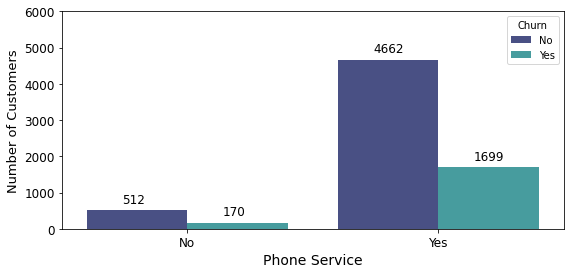

In [22]:
# Description Percent
df_PhoneService = pd.DataFrame(df["PhoneService"].value_counts())
df_PhoneService['Percent'] = [round(i*100/sum(df_PhoneService.PhoneService),1) for i in df_PhoneService.PhoneService]

df_PhoneService_churn = pd.DataFrame(df.PhoneService[(df["Churn"] == 'Yes')].value_counts())
df_PhoneService['Churn'] = df_PhoneService_churn.PhoneService
df_PhoneService['Churn %'] = [round(i*100/sum(df_PhoneService_churn.PhoneService),1) for i in df_PhoneService_churn.PhoneService]

df_PhoneService_nonchurn = pd.DataFrame(df.PhoneService[(df["Churn"] == 'No')].value_counts())
df_PhoneService['Non-Churn'] = df_PhoneService_nonchurn.PhoneService
df_PhoneService['Non-Churn %'] = [round(i*100/sum(df_PhoneService_nonchurn.PhoneService),1) for i in df_PhoneService_nonchurn.PhoneService]

print(df_PhoneService)

# Chart

plt.figure(figsize=(9,4))

ax = sns.countplot(data = df, palette = 'mako', x="PhoneService", hue = "Churn")

plt.xlabel("Phone Service", fontsize= 14)
plt.ylabel("Number of Customers", fontsize= 13)
plt.ylim(0,6000)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.14, p.get_height()+200), fontsize= 12)

- **Customers with phone service are less likely to continue using the service than customers without phone service**.

- About 91% of customers with phone service have stopped using the service, while only 9% of customers without phone service have stopped using the service.

- About 90% of customers without phone service are still using the service, while only 9% of customers with phone service are still using the service.

- About 10% of customers have an unknown phone service status.

* #### MultipleLines

                  MultipleLines  Percent  Churn  Churn %  Non-Churn  \
No                         2908     41.3    724     39.4       2184   
Yes                        2537     36.0    737     38.7       1800   
Unknown                    1009     14.3    261     14.0        748   
No phone service            589      8.4    147      7.9        442   

                  Non-Churn %  
No                       42.2  
Yes                      34.8  
Unknown                  14.5  
No phone service          8.5  


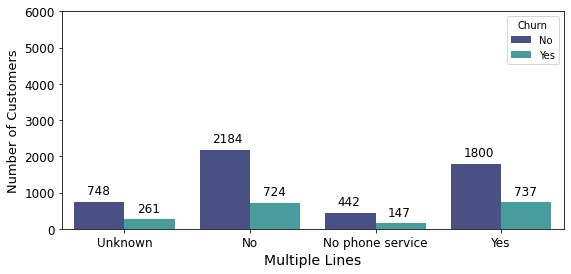

In [23]:
# Description Percent
df_MultipleLines = pd.DataFrame(df["MultipleLines"].value_counts())
df_MultipleLines['Percent'] = [round(i*100/sum(df_MultipleLines.MultipleLines),1) for i in df_MultipleLines.MultipleLines]

df_MultipleLines_churn = pd.DataFrame(df.MultipleLines[(df["Churn"] == 'Yes')].value_counts())
df_MultipleLines['Churn'] = df_MultipleLines_churn.MultipleLines
df_MultipleLines['Churn %'] = [round(i*100/sum(df_MultipleLines_churn.MultipleLines),1) for i in df_MultipleLines_churn.MultipleLines]

df_MultipleLines_nonchurn = pd.DataFrame(df.MultipleLines[(df["Churn"] == 'No')].value_counts())
df_MultipleLines['Non-Churn'] = df_MultipleLines_nonchurn.MultipleLines
df_MultipleLines['Non-Churn %'] = [round(i*100/sum(df_MultipleLines_nonchurn.MultipleLines),1) for i in df_MultipleLines_nonchurn.MultipleLines]

print(df_MultipleLines)

# Chart

plt.figure(figsize=(9,4))

ax = sns.countplot(data = df, palette = 'mako', x="MultipleLines", hue = "Churn")

plt.xlabel("Multiple Lines", fontsize= 14)
plt.ylabel("Number of Customers", fontsize= 13)
plt.ylim(0,6000)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+200), fontsize= 12)

- **Customers with multiple lines are not more likely to stop using the service than customers without multiple lines**.

- About 39% of customers with multiple lines have stopped using the service, while about 38% of customers without multiple lines have stopped using the service.

- About 42% of customers without multiple lines are still using the service, while about 35% of customers with multiple lines are still using the service.

- About 14% of customers have an unknown multiple line status.

* #### InternetService

             InternetService  Percent  Churn  Churn %  Non-Churn  Non-Churn %
Fiber optic             2621     37.2   1109     59.3       1109         59.3
DSL                     2092     29.7    401     21.5        401         21.5
No                      1321     18.8     98     14.0         98         14.0
Unknown                 1009     14.3    261      5.2        261          5.2


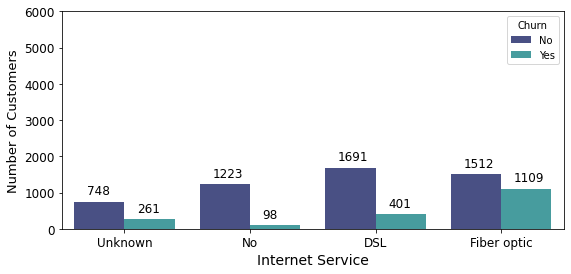

In [24]:
# Description Percent
df_InternetService = pd.DataFrame(df["InternetService"].value_counts())
df_InternetService['Percent'] = [round(i*100/sum(df_InternetService.InternetService),1) for i in df_InternetService.InternetService]

df_InternetService_churn = pd.DataFrame(df.InternetService[(df["Churn"] == 'Yes')].value_counts())
df_InternetService['Churn'] = df_InternetService_churn.InternetService
df_InternetService['Churn %'] = [round(i*100/sum(df_InternetService_churn.InternetService),1) for i in df_InternetService_churn.InternetService]

df_InternetService_nonchurn = pd.DataFrame(df.InternetService[(df["Churn"] == 'Yes')].value_counts())
df_InternetService['Non-Churn'] = df_InternetService_nonchurn.InternetService
df_InternetService['Non-Churn %'] = [round(i*100/sum(df_InternetService_nonchurn.InternetService),1) for i in df_InternetService_nonchurn.InternetService]

print(df_InternetService)

# Chart

plt.figure(figsize=(9,4))

ax = sns.countplot(data = df, palette = 'mako', x="InternetService", hue = "Churn")

plt.xlabel("Internet Service", fontsize= 14)
plt.ylabel("Number of Customers", fontsize= 13)
plt.ylim(0,6000)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+200), fontsize= 12)

- **Customers who use fiber optic internet service are more likely to stop using the service than customers who use DSL internet service**.

- About 59% of customers who use fiber optic internet service have stopped using the service, while about 22% of customers who use DSL internet service have stopped using the service.

- About 33% of customers who use fiber optic internet service are still using the service, while about 30% of customers who use DSL internet service are still using the service.

- About 14% of customers do not have internet service.

- About 5% of customers have an unknown internet service status.

* #### OnlineSecurity

                     OnlineSecurity  Percent  Churn  Churn %  Non-Churn  \
No                             2993     42.5   1259     67.4       1734   
Yes                            1720     24.4    251     14.0       1469   
No internet service            1321     18.8     98     13.4       1223   
Unknown                        1009     14.3    261      5.2        748   

                     Non-Churn %  
No                          33.5  
Yes                         28.4  
No internet service         23.6  
Unknown                     14.5  


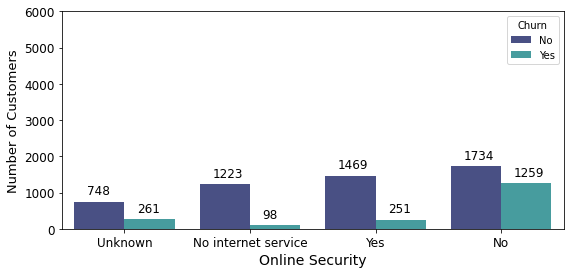

In [25]:
# Description Percent
df_OnlineSecurity = pd.DataFrame(df["OnlineSecurity"].value_counts())
df_OnlineSecurity['Percent'] = [round(i*100/sum(df_OnlineSecurity.OnlineSecurity),1) for i in df_OnlineSecurity.OnlineSecurity]

df_OnlineSecurity_churn = pd.DataFrame(df.OnlineSecurity[(df["Churn"] == 'Yes')].value_counts())
df_OnlineSecurity['Churn'] = df_OnlineSecurity_churn.OnlineSecurity
df_OnlineSecurity['Churn %'] = [round(i*100/sum(df_OnlineSecurity_churn.OnlineSecurity),1) for i in df_OnlineSecurity_churn.OnlineSecurity]

df_OnlineSecurity_nonchurn = pd.DataFrame(df.OnlineSecurity[(df["Churn"] == 'No')].value_counts())
df_OnlineSecurity['Non-Churn'] = df_OnlineSecurity_nonchurn.OnlineSecurity
df_OnlineSecurity['Non-Churn %'] = [round(i*100/sum(df_OnlineSecurity_nonchurn.OnlineSecurity),1) for i in df_OnlineSecurity_nonchurn.OnlineSecurity]

print(df_OnlineSecurity)

# Chart

plt.figure(figsize=(9,4))

ax = sns.countplot(data = df, palette = 'mako', x="OnlineSecurity", hue = "Churn")

plt.xlabel("Online Security", fontsize= 14)
plt.ylabel("Number of Customers", fontsize= 13)
plt.ylim(0,6000)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+200), fontsize= 12)

- **Customers who do not use online security are more likely to stop using the service than customers who do use online security**.

- About 86% of customers who do not use online security have stopped using the service, while only 33% of customers who do use online security have stopped using the service.

- About 66% of customers who use online security are still using the service, while only 28% of customers who do not use online security are still using the service.

- About 13% of customers do not have internet service.

- About 5% of customers have an unknown online security status.

* #### OnlineBackup

                     OnlineBackup  Percent  Churn  Churn %  Non-Churn  \
No                           2643     37.5   1067     57.1       1576   
Yes                          2070     29.4    443     23.7       1627   
No internet service          1321     18.8     98     14.0       1223   
Unknown                      1009     14.3    261      5.2        748   

                     Non-Churn %  
No                          31.4  
Yes                         30.5  
No internet service         23.6  
Unknown                     14.5  


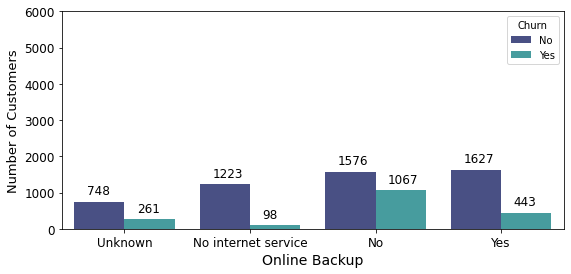

In [26]:
# Description Percent
df_OnlineBackup = pd.DataFrame(df["OnlineBackup"].value_counts())
df_OnlineBackup['Percent'] = [round(i*100/sum(df_OnlineBackup.OnlineBackup),1) for i in df_OnlineBackup.OnlineBackup]

df_OnlineBackup_churn = pd.DataFrame(df.OnlineBackup[(df["Churn"] == 'Yes')].value_counts())
df_OnlineBackup['Churn'] = df_OnlineBackup_churn.OnlineBackup
df_OnlineBackup['Churn %'] = [round(i*100/sum(df_OnlineBackup_churn.OnlineBackup),1) for i in df_OnlineBackup_churn.OnlineBackup]

df_OnlineBackup_nonchurn = pd.DataFrame(df.OnlineBackup[(df["Churn"] == 'No')].value_counts())
df_OnlineBackup['Non-Churn'] = df_OnlineBackup_nonchurn.OnlineBackup
df_OnlineBackup['Non-Churn %'] = [round(i*100/sum(df_OnlineBackup_nonchurn.OnlineBackup),1) for i in df_OnlineBackup_nonchurn.OnlineBackup]

print(df_OnlineBackup)

# Chart

plt.figure(figsize=(9,4))

ax = sns.countplot(data = df, palette = 'mako', x="OnlineBackup", hue = "Churn")

plt.xlabel("Online Backup", fontsize= 14)
plt.ylabel("Number of Customers", fontsize= 13)
plt.ylim(0,6000)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+200), fontsize= 12)

- **Customers who do not use online backup are more likely to stop using the service than customers who do use online backup**.

- About 76% of customers who do not use online backup have stopped using the service, while only 43% of customers who do use online backup have stopped using the service.

- About 69% of customers who use online backup are still using the service, while only 30% of customers who do not use online backup are still using the service.

- About 14% of customers do not have internet service.

- About 5% of customers have an unknown online backup status.

* #### DeviceProtection

                     DeviceProtection  Percent  DeviceProtection churn  \
No                               2643     37.5                    1043   
Yes                              2070     29.4                     467   
No internet service              1321     18.8                      98   
Unknown                          1009     14.3                     261   

                     Percent churn  
No                            55.8  
Yes                           25.0  
No internet service           14.0  
Unknown                        5.2  


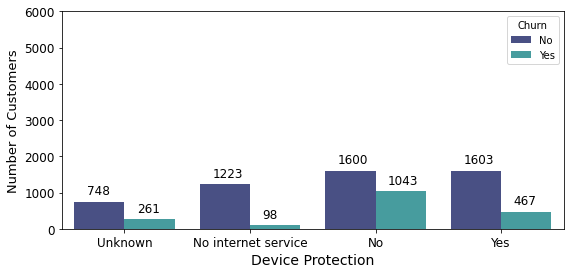

In [27]:
# Description Percent
df_DeviceProtection = pd.DataFrame(df["DeviceProtection"].value_counts())
df_DeviceProtection['Percent'] = [round(i*100/sum(df_DeviceProtection.DeviceProtection),1) for i in df_DeviceProtection.DeviceProtection]

df_DeviceProtection_churn = pd.DataFrame(df.DeviceProtection[(df["Churn"] == 'Yes')].value_counts())
df_DeviceProtection['DeviceProtection churn'] = df_DeviceProtection_churn.DeviceProtection
df_DeviceProtection['Percent churn'] = [round(i*100/sum(df_DeviceProtection_churn.DeviceProtection),1) for i in df_DeviceProtection_churn.DeviceProtection]

print(df_DeviceProtection)

# Chart

plt.figure(figsize=(9,4))

ax = sns.countplot(data = df, palette = 'mako', x="DeviceProtection", hue = "Churn")

plt.xlabel("Device Protection", fontsize= 14)
plt.ylabel("Number of Customers", fontsize= 13)
plt.ylim(0,6000)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+200), fontsize= 12)

- **Customers who do not use device protection are more likely to stop using the service than customers who do use device protection**.

- About 70% of customers who do not use device protection have stopped using the service, while only 62.5% of customers who do use device protection have stopped using the service.

- About 75% of customers who use device protection are still using the service, while only 25% of customers who do not use device protection are still using the service.

- About 19% of customers do not have internet service.

- About 5% of customers have an unknown device protection status.

* #### TechSupport

                     TechSupport  Percent  Churn  Churn %  Non-Churn  \
No                          2973     42.2   1235     66.1       1738   
Yes                         1740     24.7    275     14.7       1465   
No internet service         1321     18.8     98     14.0       1223   
Unknown                     1009     14.3    261      5.2        748   

                     Non-Churn %  
No                          33.6  
Yes                         28.3  
No internet service         23.6  
Unknown                     14.5  


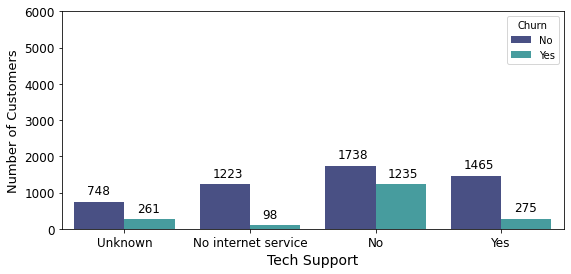

In [28]:
# Description Percent
df_TechSupport = pd.DataFrame(df["TechSupport"].value_counts())
df_TechSupport['Percent'] = [round(i*100/sum(df_TechSupport.TechSupport),1) for i in df_TechSupport.TechSupport]

df_TechSupport_churn = pd.DataFrame(df.TechSupport[(df["Churn"] == 'Yes')].value_counts())
df_TechSupport['Churn'] = df_TechSupport_churn.TechSupport
df_TechSupport['Churn %'] = [round(i*100/sum(df_TechSupport_churn.TechSupport),1) for i in df_TechSupport_churn.TechSupport]

df_TechSupport_nonchurn = pd.DataFrame(df.TechSupport[(df["Churn"] == 'No')].value_counts())
df_TechSupport['Non-Churn'] = df_TechSupport_nonchurn.TechSupport
df_TechSupport['Non-Churn %'] = [round(i*100/sum(df_TechSupport_nonchurn.TechSupport),1) for i in df_TechSupport_nonchurn.TechSupport]

print(df_TechSupport)

# Chart

plt.figure(figsize=(9,4))

ax = sns.countplot(data = df, palette = 'mako', x="TechSupport", hue = "Churn")

plt.xlabel("Tech Support", fontsize= 14)
plt.ylabel("Number of Customers", fontsize= 13)
plt.ylim(0,6000)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+200), fontsize= 12)

- **Customers who do not use tech support are more likely to stop using the service than customers who do use tech support**.

- About 85% of customers who do not use tech support have stopped using the service, while only 34% of customers who do use tech support have stopped using the service.

- About 66% of customers who use tech support are still using the service, while only 28% of customers who do not use tech support are still using the service.

- About 14% of customers do not have internet service.

- About 5% of customers have an unknown tech support status.

* #### StreamingTV

                     StreamingTV  Percent  Churn  Churn %  Non-Churn  \
No                          2403     34.1    802     42.9       1601   
Yes                         2310     32.8    708     37.9       1602   
No internet service         1321     18.8     98     14.0       1223   
Unknown                     1009     14.3    261      5.2        748   

                     Non-Churn %  
No                          31.0  
Yes                         30.9  
No internet service         23.6  
Unknown                     14.5  


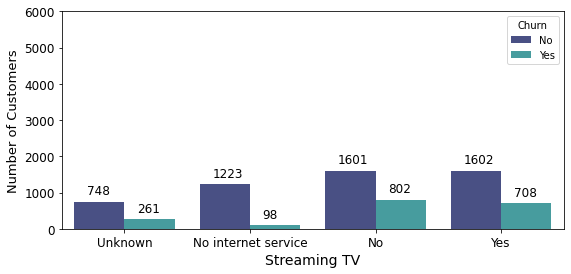

In [29]:
# Description Percent
df_StreamingTV = pd.DataFrame(df["StreamingTV"].value_counts())
df_StreamingTV['Percent'] = [round(i*100/sum(df_StreamingTV.StreamingTV),1) for i in df_StreamingTV.StreamingTV]

df_StreamingTV_churn = pd.DataFrame(df.StreamingTV[(df["Churn"] == 'Yes')].value_counts())
df_StreamingTV['Churn'] = df_StreamingTV_churn.StreamingTV
df_StreamingTV['Churn %'] = [round(i*100/sum(df_StreamingTV_churn.StreamingTV),1) for i in df_StreamingTV_churn.StreamingTV]

df_StreamingTV_nonchurn = pd.DataFrame(df.StreamingTV[(df["Churn"] == 'No')].value_counts())
df_StreamingTV['Non-Churn'] = df_StreamingTV_nonchurn.StreamingTV
df_StreamingTV['Non-Churn %'] = [round(i*100/sum(df_StreamingTV_nonchurn.StreamingTV),1) for i in df_StreamingTV_nonchurn.StreamingTV]

print(df_StreamingTV)

# Chart

plt.figure(figsize=(9,4))

ax = sns.countplot(data = df, palette = 'mako', x="StreamingTV", hue = "Churn")

plt.xlabel("Streaming TV", fontsize= 14)
plt.ylabel("Number of Customers", fontsize= 13)
plt.ylim(0,6000)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+200), fontsize= 12)

- **There is no significant difference in the churn rate between customers who use streaming TV services and customers who do not use streaming TV services**.

- About 38% of customers who use streaming TV services have stopped using the service, while about 43% of customers who do not use streaming TV services have stopped using the service.

- About 31% of customers who use streaming TV services are still using the service, while about 31% of customers who do not use streaming TV services are still using the service.

- About 14% of customers do not have internet service.

- About 5% of customers have an unknown streaming TV service status.

* #### StreamingMovies

                     StreamingMovies  Percent  Churn  Churn %  Non-Churn  \
No                              2394     34.0    813     43.5       1581   
Yes                             2319     32.9    697     37.3       1622   
No internet service             1321     18.8     98     14.0       1223   
Unknown                         1009     14.3    261      5.2        748   

                     Non-Churn %  
No                          31.3  
Yes                         30.6  
No internet service         23.6  
Unknown                     14.5  


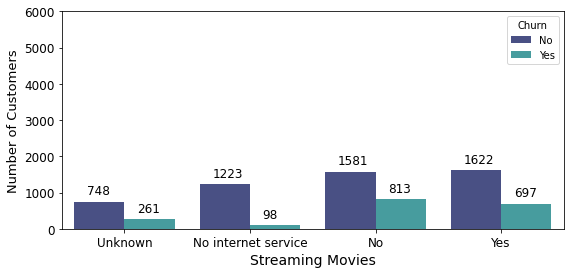

In [30]:
# Description Percent
df_StreamingMovies = pd.DataFrame(df["StreamingMovies"].value_counts())
df_StreamingMovies['Percent'] = [round(i*100/sum(df_StreamingMovies.StreamingMovies),1) for i in df_StreamingMovies.StreamingMovies]

df_StreamingMovies_churn = pd.DataFrame(df.StreamingMovies[(df["Churn"] == 'Yes')].value_counts())
df_StreamingMovies['Churn'] = df_StreamingMovies_churn.StreamingMovies
df_StreamingMovies['Churn %'] = [round(i*100/sum(df_StreamingMovies_churn.StreamingMovies),1) for i in df_StreamingMovies_churn.StreamingMovies]

df_StreamingMovies_nonchurn = pd.DataFrame(df.StreamingMovies[(df["Churn"] == 'No')].value_counts())
df_StreamingMovies['Non-Churn'] = df_StreamingMovies_nonchurn.StreamingMovies
df_StreamingMovies['Non-Churn %'] = [round(i*100/sum(df_StreamingMovies_nonchurn.StreamingMovies),1) for i in df_StreamingMovies_nonchurn.StreamingMovies]

print(df_StreamingMovies)

# Chart

plt.figure(figsize=(9,4))

ax = sns.countplot(data = df, palette = 'mako', x="StreamingMovies", hue = "Churn")

plt.xlabel("Streaming Movies", fontsize= 14)
plt.ylabel("Number of Customers", fontsize= 13)
plt.ylim(0,6000)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+200), fontsize= 12)

- **Customers who do not use movie streaming services are more likely to stop using the service than customers who do use movie streaming services**.

- About 43% of customers who do not use movie streaming services have stopped using the service, while only 37% of customers who do use movie streaming services have stopped using the service.

- About 31% of customers who use movie streaming services are still using the service, while about 30% of customers who do not use movie streaming services are still using the service.

- About 14% of customers do not have internet service.

- About 5% of customers have an unknown movie streaming service status.

### Customer Account Information Analysis

#### What's the insight on churn and non-churn customers based on customer account information such as paperless billing, payment method, and contract?


* #### PaperlessBilling

     PaperlessBilling  Percent  Churn  Churn %  Non-Churn  Non-Churn %
Yes              4171     59.2   1400     74.9       2771         53.6
No               2872     40.8    469     25.1       2403         46.4


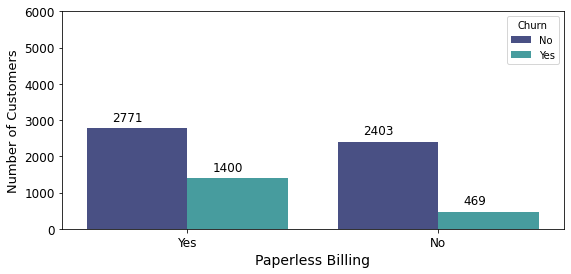

In [32]:
# Description Percent
df_PaperlessBilling = pd.DataFrame(df["PaperlessBilling"].value_counts())
df_PaperlessBilling['Percent'] = [round(i*100/sum(df_PaperlessBilling.PaperlessBilling),1) for i in df_PaperlessBilling.PaperlessBilling]

df_PaperlessBilling_churn = pd.DataFrame(df.PaperlessBilling[(df["Churn"] == 'Yes')].value_counts())
df_PaperlessBilling['Churn'] = df_PaperlessBilling_churn.PaperlessBilling
df_PaperlessBilling['Churn %'] = [round(i*100/sum(df_PaperlessBilling_churn.PaperlessBilling),1) for i in df_PaperlessBilling_churn.PaperlessBilling]

df_PaperlessBilling_nonchurn = pd.DataFrame(df.PaperlessBilling[(df["Churn"] == 'No')].value_counts())
df_PaperlessBilling['Non-Churn'] = df_PaperlessBilling_nonchurn.PaperlessBilling
df_PaperlessBilling['Non-Churn %'] = [round(i*100/sum(df_PaperlessBilling_nonchurn.PaperlessBilling),1) for i in df_PaperlessBilling_nonchurn.PaperlessBilling]

print(df_PaperlessBilling)

# Chart

plt.figure(figsize=(9,4))

ax = sns.countplot(data = df, palette = 'mako', x="PaperlessBilling", hue = "Churn")

plt.xlabel("Paperless Billing", fontsize= 14)
plt.ylabel("Number of Customers", fontsize= 13)
plt.ylim(0,6000)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+200), fontsize= 12)

- **Customers who do not use paperless billing are significantly more likely to stop using the service than customers who do use paperless billing**.

- About 75% of customers who do not use paperless billing have stopped using the service, while only 25% of customers who do use paperless billing have stopped using the service.

- About 54% of customers who use paperless billing are still using the service, while about 46% of customers who do not use paperless billing are still using the service.

* #### PaymentMethod

                           PaymentMethod  Percent  Churn  Churn %  Non-Churn  \
Electronic check                    2365     33.6   1071     57.3       1294   
Mailed check                        1612     22.9    308     16.5       1304   
Bank transfer (automatic)           1544     21.9    258     13.8       1286   
Credit card (automatic)             1522     21.6    232     12.4       1290   

                           Non-Churn %  
Electronic check                  25.2  
Mailed check                      25.0  
Bank transfer (automatic)         24.9  
Credit card (automatic)           24.9  


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Electronic check'),
  Text(0, 1, 'Mailed check'),
  Text(0, 2, 'Bank transfer (automatic)'),
  Text(0, 3, 'Credit card (automatic)')])

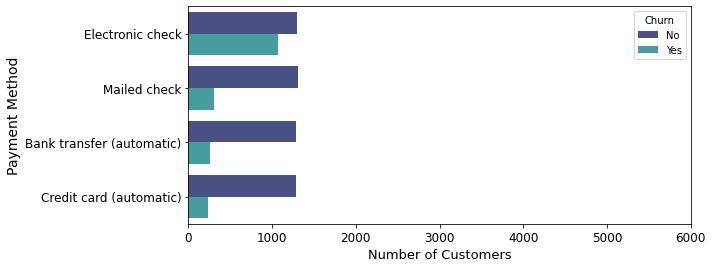

In [33]:
# Description Percent
df_PaymentMethod = pd.DataFrame(df["PaymentMethod"].value_counts())
df_PaymentMethod['Percent'] = [round(i*100/sum(df_PaymentMethod.PaymentMethod),1) for i in df_PaymentMethod.PaymentMethod]

df_PaymentMethod_churn = pd.DataFrame(df.PaymentMethod[(df["Churn"] == 'Yes')].value_counts())
df_PaymentMethod['Churn'] = df_PaymentMethod_churn.PaymentMethod
df_PaymentMethod['Churn %'] = [round(i*100/sum(df_PaymentMethod_churn.PaymentMethod),1) for i in df_PaymentMethod_churn.PaymentMethod]

df_PaymentMethod_nonchurn = pd.DataFrame(df.PaymentMethod[(df["Churn"] == 'No')].value_counts())
df_PaymentMethod['Non-Churn'] = df_PaymentMethod_nonchurn.PaymentMethod
df_PaymentMethod['Non-Churn %'] = [round(i*100/sum(df_PaymentMethod_nonchurn.PaymentMethod),1) for i in df_PaymentMethod_nonchurn.PaymentMethod]

print(df_PaymentMethod)

# Chart

plt.figure(figsize=(9,4))

ax = sns.countplot(data = df, palette = 'mako', y="PaymentMethod", hue = "Churn")

plt.ylabel("Payment Method", fontsize= 14)
plt.xlabel("Number of Customers", fontsize= 13)
plt.xlim(0,6000)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

- **Customers who use the electronic check payment method are more likely to stop using the service than customers who use other payment methods**.

- About 57% of customers who use the electronic check payment method have stopped using the service, while about 17% of customers who use mailed checks, 14% of customers who use bank transfers (automatic), and 12% of customers who use credit cards (automatic) have stopped using the service.

- About 25% of customers who use the electronic check payment method are still using the service, while about 25% of customers who use mailed checks, 25% of customers who use bank transfers (automatic), and 25% of customers who use credit cards (automatic) are still using the service.

* #### Contract

                Contract  Percent  Churn  Churn %  Non-Churn  Non-Churn %
Month-to-month      3875     55.0   1655     88.6       2220         42.9
Two year            1695     24.1     48      8.9       1647         31.8
One year            1473     20.9    166      2.6       1307         25.3


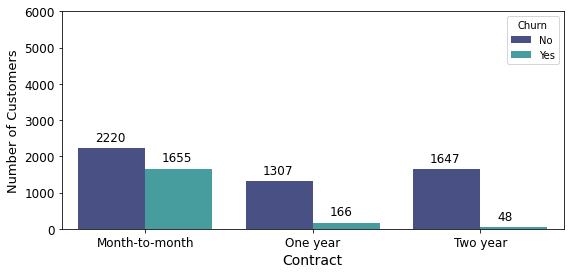

In [31]:
# Description Percent
df_Contract = pd.DataFrame(df["Contract"].value_counts())
df_Contract['Percent'] = [round(i*100/sum(df_Contract.Contract),1) for i in df_Contract.Contract]

df_Contract_churn = pd.DataFrame(df.Contract[(df["Churn"] == 'Yes')].value_counts())
df_Contract['Churn'] = df_Contract_churn.Contract
df_Contract['Churn %'] = [round(i*100/sum(df_Contract_churn.Contract),1) for i in df_Contract_churn.Contract]

df_Contract_nonchurn = pd.DataFrame(df.Contract[(df["Churn"] == 'No')].value_counts())
df_Contract['Non-Churn'] = df_Contract_nonchurn.Contract
df_Contract['Non-Churn %'] = [round(i*100/sum(df_Contract_nonchurn.Contract),1) for i in df_Contract_nonchurn.Contract]
print(df_Contract)

# Chart

plt.figure(figsize=(9,4))

ax = sns.countplot(data = df, palette = 'mako', x="Contract", hue = "Churn")

plt.xlabel("Contract", fontsize= 14)
plt.ylabel("Number of Customers", fontsize= 13)
plt.ylim(0,6000)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+200), fontsize= 12)

- **Customers who do not use month-to-month contracts are significantly more likely to stop using the service than customers who have one-year or two-year contracts**.

- About 89% of customers who do not use month-to-month contracts have stopped using the service, while only 2% of customers who have one-year contracts and 9% of customers who have two-year contracts have stopped using the service.

- About 32% of customers who do not use month-to-month contracts are still using the service, while about 25% of customers who have one-year contracts and 32% of customers who have two-year contracts are still using the service.

#### What's the insight into whether there is a relationship between monthly charges, total charges, and tenure on churn rate?

* #### MonthlyCharges

total 456116.6 
churn 139130.85 
Churn % 31 
Non-Churn 316985.75 
Non-Churn % 69
Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64 



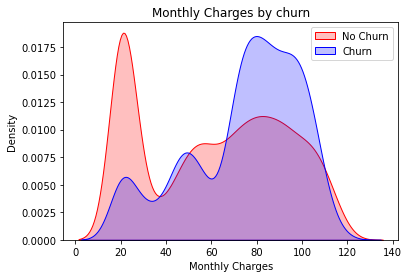

In [34]:
# Description Percent
total = df["MonthlyCharges"].sum()

total_churn = df.MonthlyCharges[(df["Churn"] == 'Yes')].sum()
percent_churn = round(total_churn*100/total)

total_nonchurn = df.MonthlyCharges[(df["Churn"] == 'No')].sum()
percent_nonchurn = round(total_nonchurn*100/total)

print("total",total, 
      "\nchurn",total_churn, 
      "\nChurn %",percent_churn, 
      "\nNon-Churn",total_nonchurn, 
      "\nNon-Churn %",percent_nonchurn)

# Chart
Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly Charges by churn')
print(df.groupby(by=['Churn'])['MonthlyCharges'].mean().sort_values(), '\n')


- **Customers who are charged high monthly fees are more likely to stop using the service than customers who are charged lower monthly fees**.

- About 69% of customers who are charged high monthly fees are still using the service, while about 31% of customers who are charged high monthly fees have stopped using the service.

- The average monthly fee for customers who are charged high monthly fees is \\$74.4, while the average monthly fee for customers who are charged low monthly fees is \\$61.2.

* #### TotalCharges

total 16071540.924999999 
churn 2862926.9 
Churn % 18 
Non-Churn 13208614.025 
Non-Churn % 82


Text(0.5, 1.0, 'Total Charges by churn')

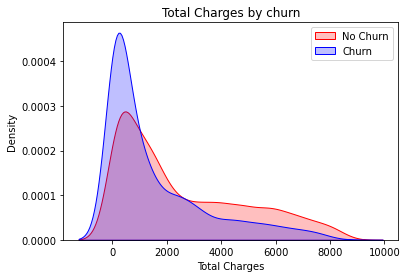

In [35]:
# Description Percent
total = df["TotalCharges"].sum()

total_churn = df.TotalCharges[(df["Churn"] == 'Yes')].sum()
percent_churn = round(total_churn*100/total)

total_nonchurn = df.TotalCharges[(df["Churn"] == 'No')].sum()
percent_nonchurn = round(total_nonchurn*100/total)

print("total",total, 
      "\nchurn",total_churn, 
      "\nChurn %",percent_churn, 
      "\nNon-Churn",total_nonchurn, 
      "\nNon-Churn %",percent_nonchurn)

# Chart
Mth = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
Mth = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total Charges')
Mth.set_title('Total Charges by churn')
print(df.groupby(by=['Churn'])['TotalCharges'].mean().sort_values(), '\n')


- **Customers who are charged higher total fees are more likely to stop using the service than customers who are charged lower total fees**.
- About 82% of customers who are charged higher total fees are still using the service, while about 18% of customers who are charged higher total fees have stopped using the service.
- The average total fee for customers who are charged higher total fees is \\$2552.9, while the average total fee for customers who are charged lower total fees is \\$1531.8.

* #### Tenure

total 227990 
churn 33603 
Churn % 15 
Non-Churn 194387 
Non-Churn % 85


Text(0.5, 1.0, 'Tenure by churn')

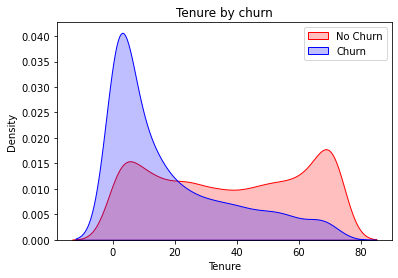

In [36]:
# Description Percent
total = df["tenure"].sum()

total_churn = df.tenure[(df["Churn"] == 'Yes')].sum()
percent_churn = round(total_churn*100/total)

total_nonchurn = df.tenure[(df["Churn"] == 'No')].sum()
percent_nonchurn = round(total_nonchurn*100/total)

print("total",total, 
      "\nchurn",total_churn, 
      "\nChurn %",percent_churn, 
      "\nNon-Churn",total_nonchurn, 
      "\nNon-Churn %",percent_nonchurn)

# Chart
Mth = sns.kdeplot(df.tenure[(df["Churn"] == 'No') ],
                color="Red", shade = True)
Mth = sns.kdeplot(df.tenure[(df["Churn"] == 'Yes') ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Tenure')
Mth.set_title('Tenure by churn')

print(df.groupby(by=['Churn'])['tenure'].mean().sort_values(), '\n')


- **Customers who have been with the company for a shorter period of time are more likely to stop using the service than customers who have been with the company for a longer period of time**.
- About 85% of customers who have been with the company for a shorter period of time are still using the service, while about 15% of customers who have been with the company for a shorter period of time have stopped using the service.
- The average tenure for customers who have been with the company for a shorter period of time is 17 months, while the average tenure for customers who have been with the company for a longer period of time is 37 months.

We can conclude that higher Monthly Charge at lower tenure results into lower Total Charge. Hence, higher Monthly Charge, lower tenure, and lower Total Charge are linked to High Churn.

In [37]:
print(df.groupby(by=['Churn'])['tenure'].mean().sort_values(), '\n')
print(df.groupby(by=['Churn'])['MonthlyCharges'].mean().sort_values(), '\n')
print(df.groupby(by=['Churn'])['TotalCharges'].mean().sort_values())

Churn
Yes    17.979133
No     37.569965
Name: tenure, dtype: float64 

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64 

Churn
Yes    1531.796094
No     2552.882494
Name: TotalCharges, dtype: float64


As expected, the average tenure period for churned customers is lower and the average monthly charges are higher than the same metrics for retained customers. The average total charges are lower for churned customers, which is probably due to their lower tenure.

The density plot for churned customers in the ‘tenure’ feature showed a high concentration in the first months.

* #### Correlation

<AxesSubplot:>

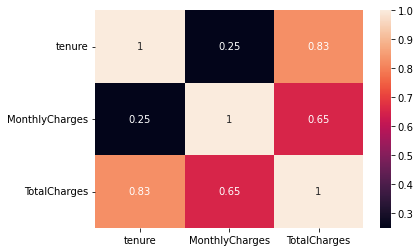

In [38]:
plt.figure(figsize = (6,4))
sns.heatmap(df.corr(), annot =True)

# Feature Engineering

* #### One Hot Encoding and Map

In [39]:
data = df.select_dtypes(include=['object']).columns.to_list()
for i in data:
    if i == 'Contract':
        df[i] = df[i].map({'Month-to-month':0,'One year':1,'Two year':2})
    elif i == 'Churn' :
        df[i] = df[i].map({'No':0,'Yes':1})
    elif i == 'customerID':
        pass
    else:
        column_enc = pd.get_dummies(df[i], prefix=i, drop_first = False)
        df = df.drop([i], axis = 1)
        df = pd.concat([df, column_enc], axis = 1)

In [40]:
df.isna().sum()

customerID                                 0
tenure                                     0
Contract                                   0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
gender_Unknown                             0
SeniorCitizen_No                           0
SeniorCitizen_Unknown                      0
SeniorCitizen_Yes                          0
Partner_No                                 0
Partner_Unknown                            0
Partner_Yes                                0
Dependents_No                              0
Dependents_Unknown                         0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLi

* #### Scaler

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

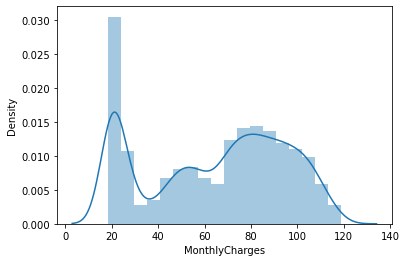

In [41]:
sns.distplot(df['MonthlyCharges']) 

<AxesSubplot:xlabel='tenure', ylabel='Density'>

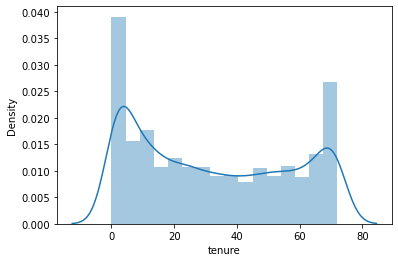

In [42]:
sns.distplot(df['tenure'])

In [43]:
scaler = StandardScaler()

In [44]:
df[['tenure']] = scaler.fit_transform(df[['tenure']])
df[['MonthlyCharges']] = scaler.fit_transform(df[['MonthlyCharges']])

In [45]:
df.head()

,customerID,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,gender_Unknown,SeniorCitizen_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Unknown,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,-1.277445,0,-1.160323,29.85,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1,5575-GNVDE,0.066327,1,-0.259629,1889.50,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,-1.236724,0,-0.362660,108.15,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3,7795-CFOCW,0.514251,1,-0.746535,1840.75,0,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,-1.236724,0,0.197365,151.65,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


# Preprocessing Modeling

* Feature Selection

In [46]:
df.drop('customerID', axis=1, inplace=True) # Identifier
df.drop('TotalCharges', axis=1, inplace=True) # Multicollinear

* Feature Importance

In [47]:
X = df.drop(['Churn'], axis =1)
y = df['Churn']

In [48]:
model = ExtraTreesClassifier()

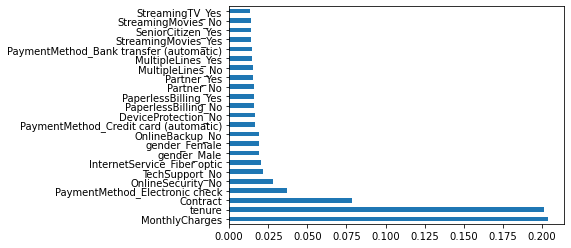

In [49]:
model.fit(X,y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(23).plot(kind='barh')
plt.show()


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

# Modeling
### Machine Learning Classification | Logistic Regression

In [51]:
model = LogisticRegression()

In [52]:
model.fit(X_train,y_train)

LogisticRegression()

In [53]:
y_pred = model.predict(X_test)

# Evaluate Model

              precision    recall  f1-score   support

   not churn       0.86      0.91      0.88      1036
       churn       0.70      0.59      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



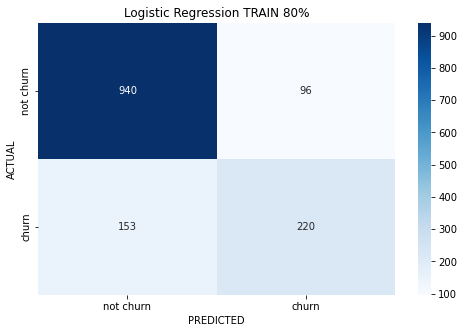

In [54]:
cm_model = confusion_matrix(y_test, y_pred)

labels=["not churn", "churn"]

print(classification_report(y_test, y_pred, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_model, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

* #### Overfit and Underfit

In [55]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [56]:
print(accuracy_score(y_train,y_pred_train))

0.7992545260915868


In [57]:
print(accuracy_score(y_test,y_pred_test))

0.8232789212207239


The model is not overfit.

* #### AUC/ROC

In [58]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
y_proba_train = model.predict_proba(X_train)[:,1]
y_proba_test = model.predict_proba(X_test)[:,1]
cm_train = confusion_matrix(y_train,y_pred_train)
cm_test = confusion_matrix(y_test,y_pred_test)

In [59]:
fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_proba_train)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)

In [60]:
# True Positive
tp_train, tp_test = cm_train[1][1], cm_test[1][1]
# True Negative
tn_train, tn_test = cm_train[0][0], cm_test[0][0]
# False Positive
fp_train, fp_test = cm_train[1][0], cm_test[1][0]
# False Negative
fn_train, fn_test = cm_train[0][1], cm_test[0][1]

In [61]:
# Overall, how often is the classifier correct?
accuracy_train, accuracy_test = ((tp_train + tn_train) / (tp_train + tn_train + fp_train + fn_train)), (
            (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test))
# When it's actually yes, how often does it predict yes?
recall_train, recall_test = (tp_train / (tp_train + fp_train)), (tp_test / (tp_test + fp_test))
# When it's actually no, how often does it predict no?
specificity_train, specificity_test = (tn_train / (tn_train + fn_train)), (tn_test / (tn_test + fn_test))
# When it predicts yes, how often is it correct?
precision_train, precision_test = (tp_train / (tp_train + fn_train)), (tp_test / (tp_test + fn_test))
# F1 Score
f1_score_train, f1_score_test = (2 * (precision_train * recall_train) / (precision_train + recall_train)), (
            2 * (precision_test * recall_test) / (precision_test + recall_test))

In [62]:
# Print all the evaluation metrics
print('\nTrain Confusion Matrix')
print(cm_train)
print('Test Confusion Matrix')
print(cm_test)
print('\nArea Under Curve')
print('AUC train & test        : %.2f%%' % (roc_auc_train * 100), '&', '%.2f%%' % (roc_auc_test * 100))
print('\nConfusion Matrix Evaluation')
print('Accuracy train & test   : %.2f%%' % (accuracy_train * 100), '&', '%.2f%%' % (accuracy_test * 100))
print('Recall train & test     : %.2f%%' % (recall_train * 100), '&', '%.2f%%' % (recall_test * 100))
print('Specificity train & test: %.2f%%' % (specificity_train * 100), '&', '%.2f%%' % (specificity_test * 100))
print('Precision train & test  : %.2f%%' % (precision_train * 100), '&', '%.2f%%' % (precision_test * 100))
print('F1 Score train & test   : %.2f%%' % (f1_score_train * 100), '&', '%.2f%%' % (f1_score_test * 100))
print('Log Loss train & test   :', round(log_loss(y_train, y_pred_train), 4), '&',
          round(log_loss(y_test, y_pred_test), 4))


Train Confusion Matrix
[[3710  428]
 [ 703  793]]
Test Confusion Matrix
[[940  96]
 [153 220]]

Area Under Curve
AUC train & test        : 83.96% & 86.09%

Confusion Matrix Evaluation
Accuracy train & test   : 79.93% & 82.33%
Recall train & test     : 53.01% & 58.98%
Specificity train & test: 89.66% & 90.73%
Precision train & test  : 64.95% & 69.62%
F1 Score train & test   : 58.37% & 63.86%
Log Loss train & test   : 6.9336 & 6.1038


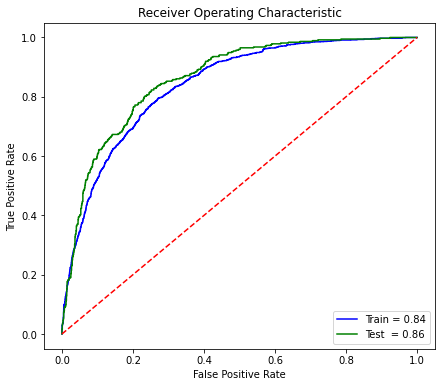

In [63]:
#create plot of ROC_AUC
plt.figure(figsize=(7, 6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_train, tpr_train, 'b', label='Train = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'g', label='Test  = %0.2f' % roc_auc_test)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

* #### Building Model with cross validation

In [64]:
regressor = LogisticRegression()

In [65]:
scores = cross_val_score(regressor,X_train,y_train,scoring="accuracy",cv=3)
scores

array([0.79605964, 0.79925453, 0.80031949])

* #### Hyperparameter Tuning 

In [66]:
regressor.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [67]:
parameters = {"penalty": ['l1', 'l2', 'elasticnet', 'none'],
              "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              "n_jobs": [None, -1],
              "max_iter": [10, 100, 1000]
             }

In [68]:
grid = GridSearchCV(estimator=regressor,param_grid=parameters,cv=3)

In [69]:
best_model = grid.fit(X_train,y_train)

In [70]:
best_model.best_params_

{'max_iter': 10, 'n_jobs': -1, 'penalty': 'l2', 'solver': 'sag'}

## Remodeling

In [71]:
model_new = LogisticRegression(solver='liblinear', penalty='l1',n_jobs=-1,max_iter=100)

In [72]:
model_new.fit(X_train,y_train)

LogisticRegression(n_jobs=-1, penalty='l1', solver='liblinear')

In [73]:
y_pred_new = model_new.predict(X_test)

              precision    recall  f1-score   support

   not churn       0.86      0.91      0.88      1036
       churn       0.70      0.59      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



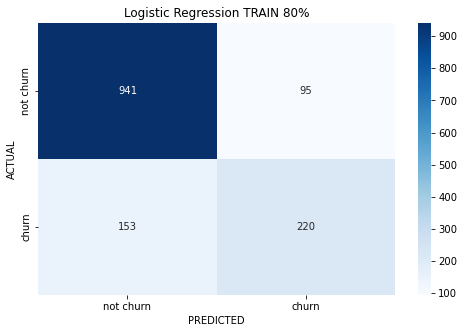

In [74]:
cm_model = confusion_matrix(y_test, y_pred_new)

labels=["not churn","churn"]

print(classification_report(y_test, y_pred_new, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_model, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

In [75]:
# Accuracy Before Evaluate
print(accuracy_score(y_test,y_pred))

0.8232789212207239


In [76]:
# Accuracy After Evaluate
print(accuracy_score(y_test,y_pred_new))

0.8239886444286728


In [77]:
print(accuracy_score(y_test,y_pred_new)>accuracy_score(y_test,y_pred))

True


- The churn rate is 26.54%, while the customer retention rate is 73.46%.
- Customers who stop using the service tend to have higher monthly charges, shorter tenures, and lower total charges.
- Female customers are almost as likely to churn as male customers. Young customers are the most likely to churn, while senior customers are the least likely to churn.
- Customers who do not have a partner or dependents are more likely to churn. Customers who have phone service are also more likely to churn.
- Customers who use fiber optic internet service are more likely to churn than customers who use DSL internet service.
- Customers who do not use online security, online backup, device protection, tech support, streaming TV, or movie streaming services are more likely to churn.
- Customers with month-to-month contracts are more likely to churn than customers with one-year or two-year contracts. Customers who do not use paperless billing are also more likely to churn.
- Customers who use electronic check payment are more likely to churn than customers who use other payment methods.
- The accuracy rate of predicting customer churn using machine learning is 82%.

# Recommendation

- Offer lower monthly charges to customers with shorter tenures. This may help to offset the higher costs associated with acquiring new customers.
- Offer discounts to customers who bundle services. This may help to encourage customers to stay with the company and use more of its services.
- Target marketing campaigns to customers who are at risk of churning. This may help to identify and address the specific needs of these customers.
- Improve customer service. This may help to resolve customer issues and complaints more quickly and effectively.
- Make it easy for customers to switch payment methods. This may help to reduce the number of customers who churn due to frustration with the payment process.
- Develop a customer loyalty program. This can help to reward customers for their continued patronage and encourage them to stay with the company.
